![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# The Sakila Database

Una de las mejores bases de datos de ejemplo que existen es la base de datos Sakila, que fue creada originalmente por MySQL y se ha convertido en código abierto bajo los términos de la licencia BSD.

La base de datos Sakila es un esquema bien normalizado que modela una tienda de alquiler de DVD, que incluye elementos como películas, actores, relaciones entre películas y actores y una tabla de inventario central que conecta películas, tiendas y alquileres.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from google.colab import files
%matplotlib inline

In [2]:
# Subir el archivo
uploaded = files.upload()

Saving sakila.db to sakila.db


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [3]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [10]:
df.shape

(16044, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [12]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `film_rental_rate` column:

In [13]:
df['film_rental_rate'].describe()

,film_rental_rate
count,16044.000000
mean,2.942630
std,1.649678
min,0.990000
25%,0.990000
50%,2.990000
75%,4.990000
max,4.990000


In [14]:
df['film_rental_rate'].mean()

2.9426302667663933

In [15]:
df['film_rental_rate'].median()

2.99

<Axes: >

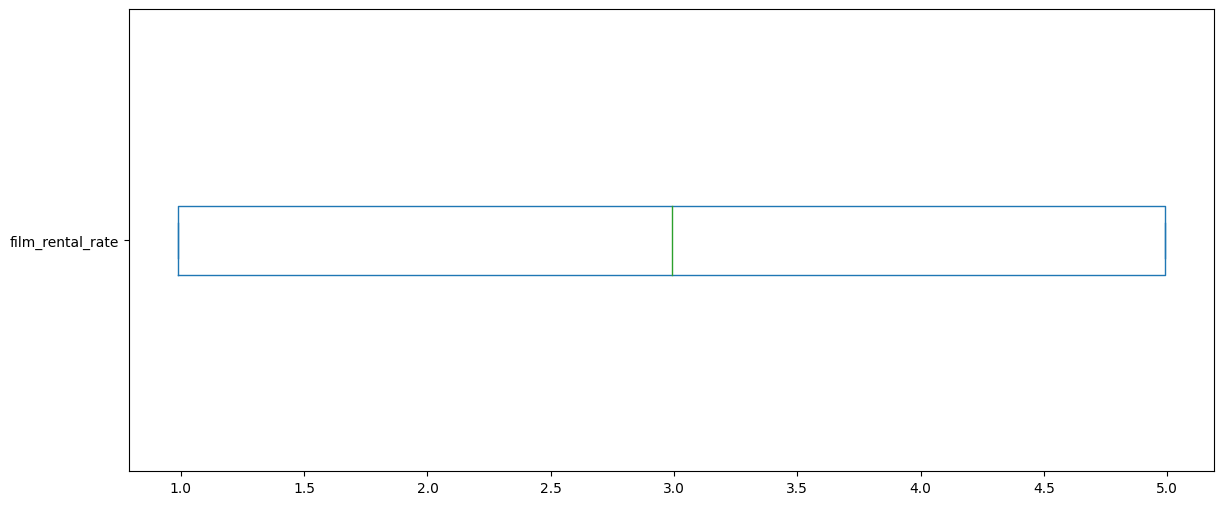

In [ ]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

In [22]:
df['film_rental_rate'].median()

2.99

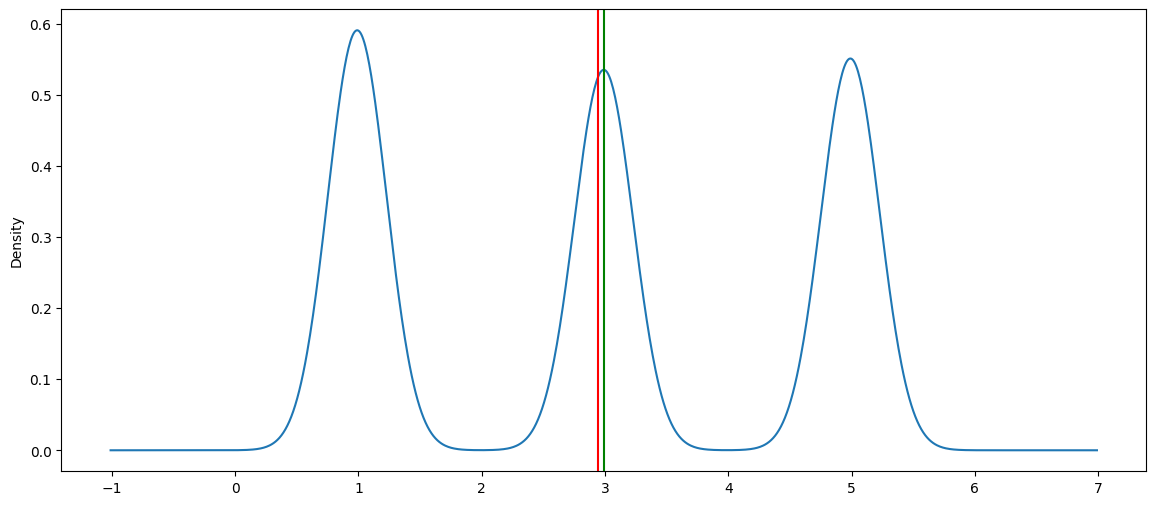

In [27]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6)) # kde
plt.axvline(df['film_rental_rate'].mean(), color='red')
plt.axvline(df['film_rental_rate'].median(), color='green')

Text(0, 0.5, 'Number of Rentals')

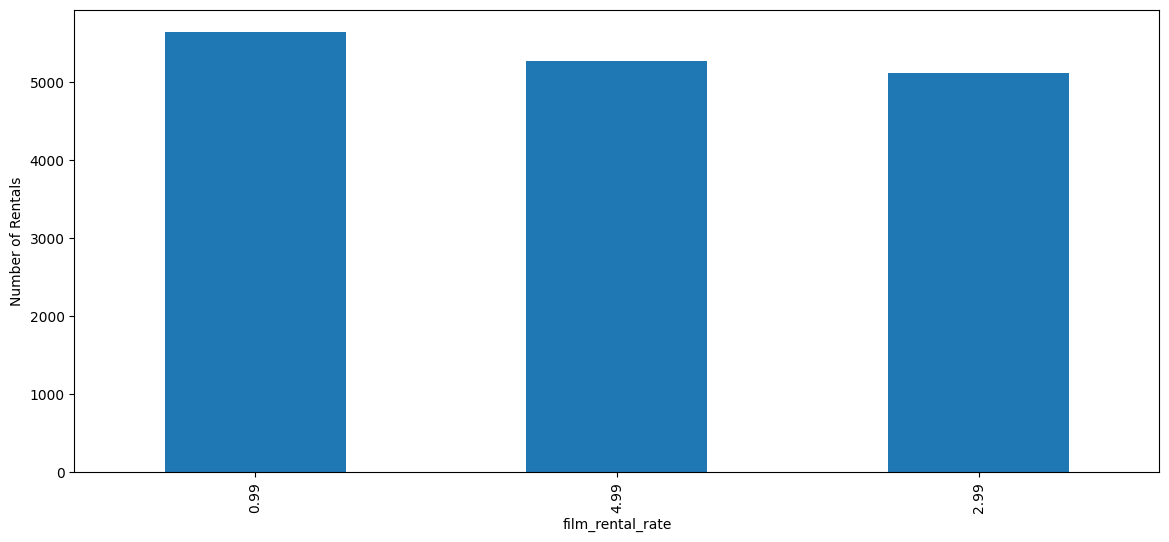

In [17]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')
ax.set_xlabel('')
ax.set_legend()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `rental_store_city` column:

In [18]:
df['rental_store_city'].value_counts()

,count
rental_store_city,
Woodridge,8121
Lethbridge,7923


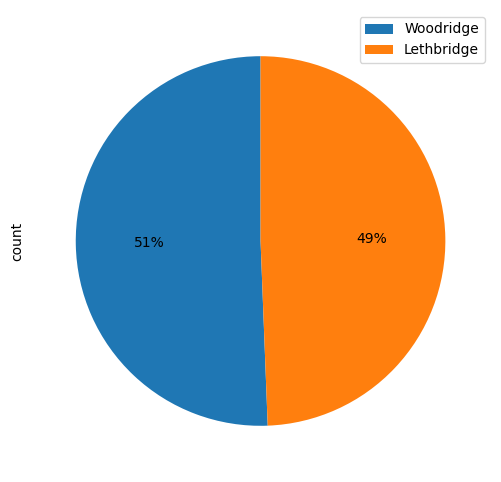

In [37]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6),autopct='%1.0f%%',startangle=90,labels=None)
plt.legend(labels=df['rental_store_city'].value_counts().index,loc="best")
plt.show()

Text(0, 0.5, 'Number of Rentals')

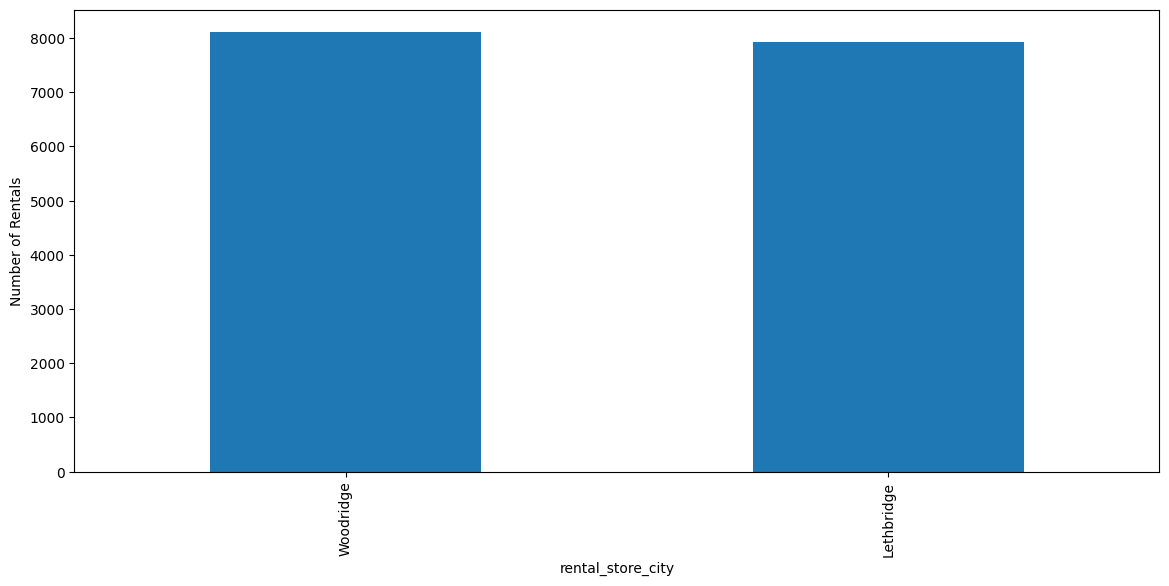

In [20]:
ax = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `rental_rate_return` column

We want to know the rental rate of return of each film. To do that we'll use this formula:

$$ rental\_gain\_return = \frac{film\_rental\_rate}{film\_replacement\_cost} * 100 $$

In [28]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

df['rental_gain_return'].head()

,rental_gain_return
rental_id,
1,13.597090
2,17.598587
3,19.946631
4,4.502046
5,9.969990


En promedio, cada alquiler de una película genera un retorno del 16.34% del costo de reemplazo de la película.

In [31]:
df['rental_gain_return'].mean().round(2)

16.34

 La mediana indica que el 50% de los alquileres generan un retorno igual o menor al 13.6% del costo de reemplazo de la película.

In [ ]:
df['rental_gain_return'].median().round(2)

13.6

> Each rental represents <b>13.6%</b> of film cost.

So <b>7.35</b> rentals are needed to recover film market price (`film_replacement_cost`)
 - Se necesitan aproximadamente 7.35 alquileres para recuperar el costo de reemplazo de una película.

In [32]:
100 / 13.6

7.352941176470589

While in average each film is rented <b>16.74</b> times.

- En promedio, cada película es alquilada 16.74 veces, lo que sugiere que, en general, las películas generan más que suficiente retorno para cubrir su costo de reemplazo.

In [33]:
df['film_title'].value_counts().mean()

16.747390396659707